<a href="https://colab.research.google.com/github/shahabday/Image_search_using_embedding/blob/main/scratchpad_create_embeddings_with_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from pathlib import Path
import os
# this path might be different for you, please check that you can
# access the files inside the paintings folder that we created in the
# previous notebook
path = Path('/gdrive/MyDrive/art_recommendation')

In [ ]:
# this should show the contents of the art_recommendation folder
os.listdir(path)

['picasso',
 'Rivera',
 'boticelli',
 'Dali',
 'pollock',
 'vangogh',
 'Yayoi_Kusama',
 'MF_Husain',
 'claude_monet',
 'banksy',
 'Modigliani',
 'vermeer',
 'Tom_Whalen',
 'Escher',
 'baldessari',
 'Giger',
 'Miro',
 'Turner',
 'Kadinsky',
 'Janco',
 'hockney',
 'AI-art',
 'aryz',
 'paul_gaugin',
 'segantini',
 'Hadid',
 'Pirosmani',
 'caravaggio',
 'diego_rivera',
 'G.S. Hunter',
 'Magritte',
 'liz_west',
 'Friedrich Caspar David',
 'Gotthard Kuehl',
 'Junjo Ito',
 'picasso_2',
 'PJ_Crook',
 'Gerhard Richter ',
 'Hans_Hartung',
 'MC_Escher',
 'Frida Kahlo',
 'caravaggio_b36',
 'Duerer',
 'Anselm_Feuerbach',
 'Bouguereau',
 'Van_Cars10',
 'kandinsky2',
 'Leonora Carrington',
 'oskar_kallis',
 'Hieronymus_Bosch',
 'Pieter_Bruegel_the_Elder',
 'Hiroshige',
 'Hokusai',
 'goya',
 'William_Blake',
 'Carl Larsson',
 'toulouse_lautrec',
 'John_Singer_Sargent (1)',
 'Balthus',
 'rembrandt_van_rijn',
 'Katharina Grosse',
 'Alfred_Kubin',
 'Hieronymus Bosch',
 'John_Singer_Sargent',
 'akira_tori

/gdrive/MyDrive/art_recommendation/alphonse_mucha/paintings/paintings_alphonse_mucha famous paintings_Image_365.jpg


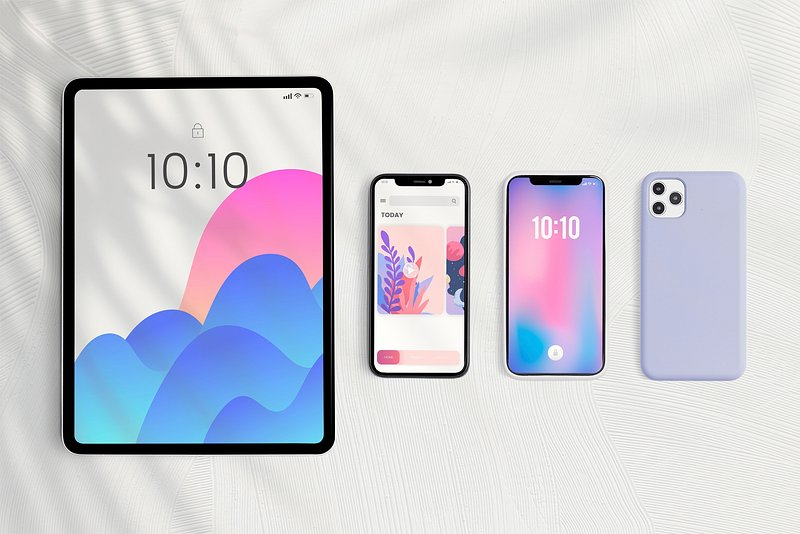

In [ ]:
from PIL import Image

artist = 'alphonse_mucha'

filepaths = os.listdir(path / artist / 'paintings')

location = path / artist / 'paintings'
# check that we can see images in the location folder
for filepath in filepaths:
  print(location / filepath)
  image = Image.open(location / filepath).convert('RGB')
  break
image

## Creating embeddings with a pretrained ResNet34

In [ ]:
import torch
from torchvision import models

# This creates the architecture with randomly initialized weights
model = models.resnet34(weights=None)

weights = models.ResNet34_Weights.IMAGENET1K_V1
# This creates the model with the pretrained weights
# This model has been trained to classify the 1000 different labels of the imagenet dataset
model = models.resnet34(weights=weights)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
dir(weights)

['__class__',
 '__doc__',
 '__eq__',
 '__hash__',
 '__module__',
 'get_state_dict',
 'meta',
 'name',
 'transforms',
 'url',
 'value',
 'verify']

In [ ]:
weights.meta

{'min_size': (1, 1),
 'categories': ['tench',
  'goldfish',
  'great white shark',
  'tiger shark',
  'hammerhead',
  'electric ray',
  'stingray',
  'cock',
  'hen',
  'ostrich',
  'brambling',
  'goldfinch',
  'house finch',
  'junco',
  'indigo bunting',
  'robin',
  'bulbul',
  'jay',
  'magpie',
  'chickadee',
  'water ouzel',
  'kite',
  'bald eagle',
  'vulture',
  'great grey owl',
  'European fire salamander',
  'common newt',
  'eft',
  'spotted salamander',
  'axolotl',
  'bullfrog',
  'tree frog',
  'tailed frog',
  'loggerhead',
  'leatherback turtle',
  'mud turtle',
  'terrapin',
  'box turtle',
  'banded gecko',
  'common iguana',
  'American chameleon',
  'whiptail',
  'agama',
  'frilled lizard',
  'alligator lizard',
  'Gila monster',
  'green lizard',
  'African chameleon',
  'Komodo dragon',
  'African crocodile',
  'American alligator',
  'triceratops',
  'thunder snake',
  'ringneck snake',
  'hognose snake',
  'green snake',
  'king snake',
  'garter snake',
  '

In [ ]:
# This turns off batch normalization and DropOut
model.eval()

# Transform the data so that it is on the same dimensions and range of values
# as the training set
transformations = weights.transforms()
transformations

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

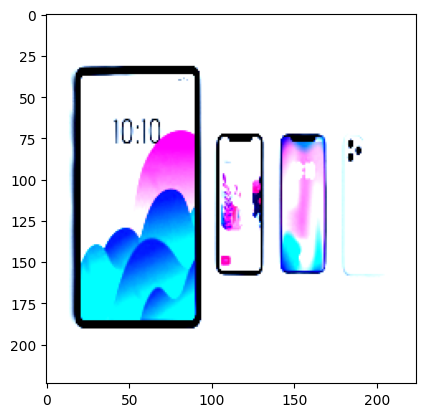

In [ ]:
import torchvision.transforms.v2 as transforms

my_rewritten_transformation = transforms.Compose([
    #transforms.Resize(256),
    transforms.Resize((224, 224)),
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))
])

plt.imshow(my_rewritten_transformation(image).permute(1, 2, 0));


In [ ]:
type(image)

PIL.Image.Image

In [ ]:
type(transforms.ToImage()(image))

torchvision.tv_tensors._image.Image

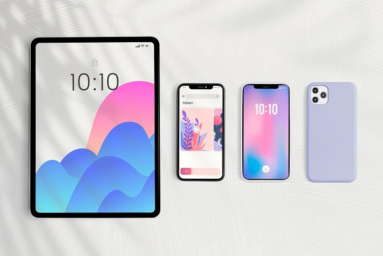

In [ ]:
transforms.Resize(256)(image)

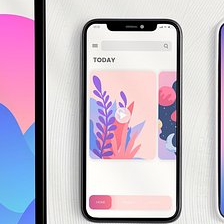

In [ ]:
transforms.CenterCrop(224)(image)

In [ ]:
transforms.ToImage()(image).shape

torch.Size([3, 534, 800])

In [ ]:
imag_resized = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224)])(image)
import numpy as np
np.exp(np.array(imag_resized) / 255.)

array([[[2.41657909, 2.40712087, 2.36038214],
        [2.42607448, 2.41657909, 2.36965671],
        [2.45478509, 2.44517733, 2.39769966],
        ...,
        [2.53301873, 2.52310477, 2.48383546],
        [2.52310477, 2.51322962, 2.474114  ],
        [2.55296365, 2.54297164, 2.50339312]],

       [[2.48383546, 2.474114  , 2.42607448],
        [2.50339312, 2.49359511, 2.44517733],
        [2.50339312, 2.49359511, 2.44517733],
        ...,
        [2.53301873, 2.52310477, 2.48383546],
        [2.53301873, 2.52310477, 2.48383546],
        [2.55296365, 2.54297164, 2.50339312]],

       [[2.46443059, 2.45478509, 2.40712087],
        [2.41657909, 2.40712087, 2.36038214],
        [2.38831533, 2.37896773, 2.33277565],
        ...,
        [2.54297164, 2.53301873, 2.49359511],
        [2.55296365, 2.54297164, 2.50339312],
        [2.56299493, 2.55296365, 2.51322962]],

       ...,

       [[2.32364542, 2.32364542, 2.30549203],
        [2.32364542, 2.32364542, 2.30549203],
        [2.32364542, 2

In [ ]:
transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224),
                    transforms.ToTensor()])(image)

tensor([[[0.8824, 0.8863, 0.8980,  ..., 0.9294, 0.9255, 0.9373],
         [0.9098, 0.9176, 0.9176,  ..., 0.9294, 0.9294, 0.9373],
         [0.9020, 0.8824, 0.8706,  ..., 0.9333, 0.9373, 0.9412],
         ...,
         [0.8431, 0.8431, 0.8431,  ..., 0.9098, 0.9137, 0.9333],
         [0.8471, 0.8431, 0.8353,  ..., 0.9176, 0.9098, 0.9059],
         [0.8510, 0.8471, 0.8392,  ..., 0.9294, 0.9098, 0.9098]],

        [[0.8784, 0.8824, 0.8941,  ..., 0.9255, 0.9216, 0.9333],
         [0.9059, 0.9137, 0.9137,  ..., 0.9255, 0.9255, 0.9333],
         [0.8980, 0.8784, 0.8667,  ..., 0.9294, 0.9333, 0.9373],
         ...,
         [0.8431, 0.8431, 0.8431,  ..., 0.9098, 0.9137, 0.9333],
         [0.8471, 0.8431, 0.8353,  ..., 0.9176, 0.9098, 0.9059],
         [0.8510, 0.8471, 0.8392,  ..., 0.9294, 0.9098, 0.9098]],

        [[0.8588, 0.8627, 0.8745,  ..., 0.9098, 0.9059, 0.9176],
         [0.8863, 0.8941, 0.8941,  ..., 0.9098, 0.9098, 0.9176],
         [0.8784, 0.8588, 0.8471,  ..., 0.9137, 0.9176, 0.

In [ ]:
transformations(image).shape

torch.Size([3, 224, 224])

In [ ]:
my_rewritten_transformation(image).shape

torch.Size([3, 224, 224])

In [ ]:
# view adds a batch dimension to the input

# logits is a fancy name for 'scores'
logits = model(transformations(image).view(1, 3, 224, 224))

logits = model(my_rewritten_transformation(image).view(1, 3, 224, 224))


logits.min(), logits.max()

(tensor(-6.1805, grad_fn=<MinBackward1>),
 tensor(13.4634, grad_fn=<MaxBackward1>))

In [ ]:
max_score_label = torch.argmax(logits).item()
max_score_label

626

In [ ]:
probs = torch.softmax(logits, dim=1)
probs.squeeze()[max_score_label]

tensor(0.4479, grad_fn=<SelectBackward0>)

In [ ]:
import requests

# The raw URL to the JSON file
url = "https://raw.githubusercontent.com/aihpi/practical-computer-vision-with-pytorch/refs/heads/main/artifacts/imagenet_classes.json"

# Fetch the file
response = requests.get(url)

# Load the JSON content into a dictionary
label_mapping = eval(response.text)

label_mapping[str(max_score_label)], probs.squeeze()[max_score_label].item()

('lighter, light, igniter, ignitor', 0.4479309618473053)

In [ ]:
model.eval()
with torch.inference_mode():
  probs, indices = torch.topk(probs.squeeze(), 5)
  for prob, index in zip(probs, indices):
    print(label_mapping[str(index.item())], f'{prob.item():.3f}')

lighter, light, igniter, ignitor 0.448
iPod 0.327
cellular telephone, cellular phone, cellphone, cell, mobile phone 0.069
lipstick, lip rouge 0.042
remote control, remote 0.016


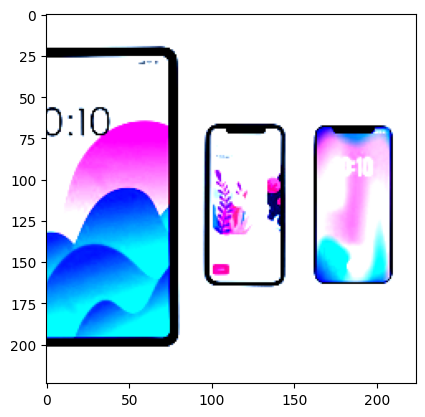

In [ ]:
import matplotlib.pyplot as plt
# This changes the order of the channels
plt.imshow(transformations(image).permute(1, 2, 0));

## Inspecting the output of convolutions

In [ ]:
first_convolutions = list(model.children())[0]
first_convolutions

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
last_convolutions = nn.Sequential(*list(model.children())[:-3])
last_convolutions

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
output_first_convs = first_convolutions(my_rewritten_transformation(image).unsqueeze(0))
output_first_convs.shape

torch.Size([1, 64, 112, 112])

In [ ]:
output_last_convs = last_convolutions(my_rewritten_transformation(image).unsqueeze(0))
output_last_convs.shape

torch.Size([1, 256, 14, 14])

In [ ]:
import torch.nn as nn
output_max_pooling = nn.MaxPool2d(2)(output_first_convs)
output_max_pooling.shape

torch.Size([1, 64, 56, 56])

In [ ]:
output_first_convs.squeeze().shape

torch.Size([64, 112, 112])

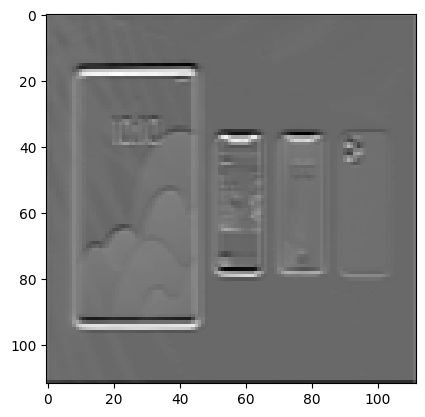

In [ ]:
squeezed_and_detached_output = output_first_convs.squeeze().detach()
plt.imshow(output_first_convs.squeeze().detach()[0, : , :], cmap='gray');

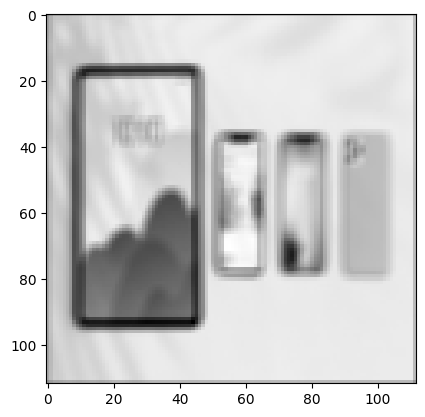

In [ ]:
# @title Visualize output of convolutions {run:'auto'}
slider_value = 63  # @param {type: "slider", min: 0, max: 63}
plt.imshow(output_first_convs.squeeze().detach()[slider_value, : , :], cmap='gray');


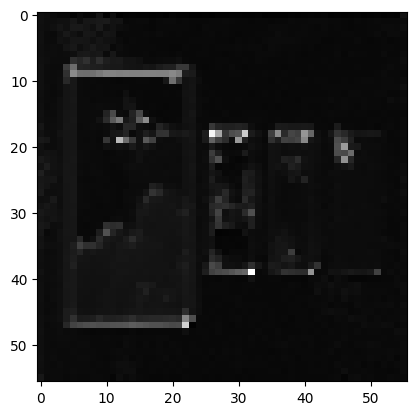

In [ ]:
# @title Visualize output of max pooling {run:'auto'}
slider_value = 10  # @param {type: "slider", min: 0, max: 63}
plt.imshow(output_max_pooling.squeeze().detach()[slider_value, : , :], cmap='gray');


In [ ]:
output_last_convs.squeeze().shape

torch.Size([256, 14, 14])

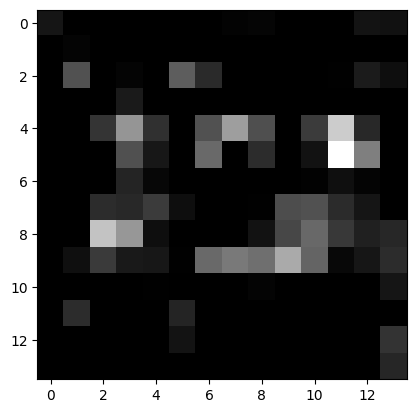

In [ ]:
# @title Visualize output of last convolutions {run:'auto'}
slider_value = 189  # @param {type: "slider", min: 0, max: 255}
plt.imshow(output_last_convs.squeeze().detach()[slider_value, : , :], cmap='gray');


## Getting the embeddings

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  